## Aufgabe 10.1
Das Bundesamt für Statistik stellt eine sehr grosse Anzahl von Datensätzen auf
ihrer Webseite zur Verfügung. Mit Hilfe des Tools STAT-TAB ist es relativ einfach,
nach bestimmten Datensätze Ausschau zu halten and spezifische Tabellen herunterzuladen und individuell zusammenzustellen.

c) Lesen Sie die Datei in Python ein, und definieren Sie eine Zeitreihe für die
Anzahl Elektro-Autos in Luzern. Erstellen Sie eine Graphik der Zeitreihe.
Hinweis: Die Dateien, welche mit Hilfe von STAT-TAB generiert werden, enthalten manchmal zusätzliche Informationen neben den regulären Headern mit
den Variablennamen. Schauen Sie sich die .csv Datei in einem Texteditor
an. Finden Sie heraus, wieviele Zeilen dem tatsächlichen Datensatz vorangehen (ausgenommen vom Header). Dann können Sie mit der Python-Funktion
pd.read_csv() die Daten einlesen, wobei Sie mit Hilfe des Parameters skiprows=k
die ersten k Zeilen überspringen können:

C:\Users\Andreas\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


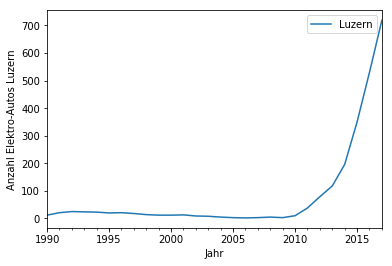

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
pw_electric = pd.read_csv('PW_electric.csv', sep=',', skiprows=2, header=0, encoding = "utf-8", index_col=0)
pw_electric.head()
pw_electric_luzern = DataFrame(pw_electric.ix["Luzern",1:])
pw_electric_luzern
pw_electric_luzern["Year"] = pd.to_datetime(pw_electric_luzern.index)
pw_electric_luzern.set_index("Year", inplace=True)
pw_electric_luzern.plot()
plt.xlabel("Jahr")
plt.ylabel("Anzahl Elektro-Autos Luzern")
plt.show()



d) Wiederholen Sie die Vorgehensweise aus Teilaufgabe (c) für den Kanton Zürich.

In [6]:

pw_electric_zurich = DataFrame(pw_electric.ix["Z<U+FFFD><U+FFFD>rich",1:])
pw_electric_zurich
pw_electric_zurich["Year"] = pd.to_datetime(pw_electric_zurich.index)
pw_electric_zurich.set_index("Year", inplace=True)
pw_electric_zurich.plot

C:\Users\Andreas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


KeyError: 'Z<U+FFFD><U+FFFD>rich'

e) Wie können Sie die Daten zwischen den Kantonen Luzern und Zürich korrekt
miteinander vergleichen?

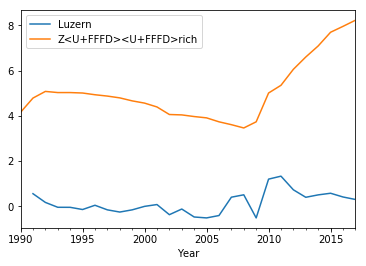

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np
# Relativer Zuwachs in Luzern
pw_electric_luzern["rel"] = np.log(pw_electric_luzern.astype('float')) - np.log(pw_electric_luzern.shift(1).astype('float'))
# Relativer Zuwachs in Zuerich
pw_electric_zurich["rel"] = np.log(pw_electric_zurich.astype('float'))
- np.log(pw_electric_zurich.shift(1).astype('float'))
pw_rel = pd.DataFrame({"Luzern" : pd.Series(pw_electric_luzern["rel"]),
"Z<U+FFFD><U+FFFD>rich" : pd.Series(pw_electric_zurich["rel"])})
pw_rel.plot()


## Aufgabe 10.2
In dieser Aufgabe behandeln wir die vierteljährliche Bierproduktion in Australien.

a) Lesen Sie die Datei AustralianBeer.csv in Python ein, und konvertieren
Sie die Daten in das Zeitreihenformat. Zeichnen Sie die Daten auf.

In [13]:
AusBeer = pd.read_csv("AustralianBeer.csv",sep=";",header=0)
AusBeer.head()
AusBeer["Quarter"] = pd.to_datetime(AusBeer["Quarter"])
AusBeer.set_index("Quarter", inplace=True)
AusBeer.columns=["Megalitres"]

In [9]:
AusBeer.head()

,Megalitres
Quarter,
1956-01-01,284.4
1956-04-01,212.8
1956-07-01,226.9
1956-10-01,308.4
1957-01-01,262.0


In [10]:
AusBeer.describe()

,Megalitres
count,154.000000
mean,408.267532
std,97.598588
min,212.800000
25%,325.425000
50%,427.450000
75%,466.950000
max,600.000000


Text(0, 0.5, 'Megalitres Beer')

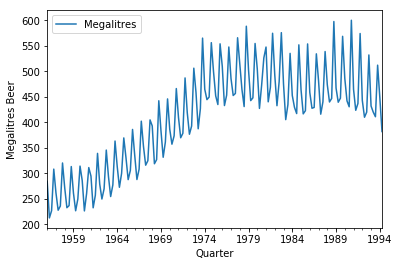

In [14]:
AusBeer.plot()
plt.ylabel("Megalitres Beer")

b) Zeichnen Sie die aggregierten jährlichen Reihen auf und die Boxplots, welche
die beobachteten Daten im Vierteljahr-Zyklus zusammenfassen. Kommentieren
Sie Ihre Beobachtungen der Graphiken.


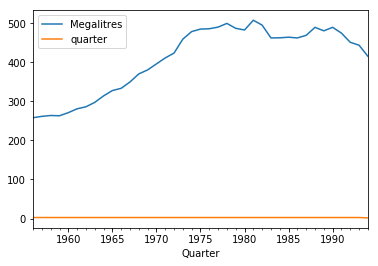

In [17]:
import seaborn as sns
AusBeer.resample("A").mean().plot()


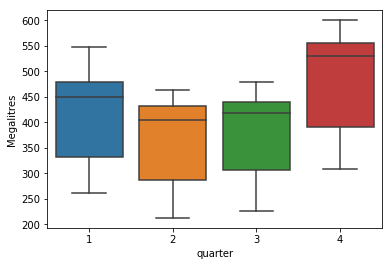

In [19]:
AusBeer['quarter'] = AusBeer.index.quarter
sns.boxplot(data=AusBeer, x='quarter', y="Megalitres")

c) Zerlegen Sie die Zeitreihe in die Komponenten trend, saisonalen Effekt und Residuen
mit Hilfe der Funktion seasonal_decompose(). Kommentieren Sie die Resultate. Denken Sie, eine Datentransformation vor der Zerlegung wäre angebracht?

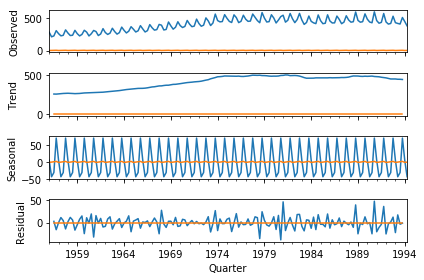

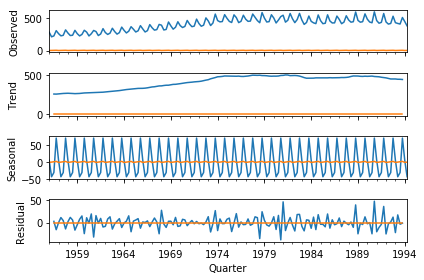

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(AusBeer, model="additive", freq=4).plot()


Die Zeitreihe des Restterms bestätigt, dass die Zeitreihe ohne weitere Transformation zerlegt werden kann. Es ist kaum ein periodisches Muster in der
Zeitreihe des Restterms erkennbar, und die

d) Zerlegen Sie die Zeitreihe nun mit Hilfe des STL-Verfahrens. Wählen Sie eine
passende Fensterbreite, indem Sie für den Parameter period=... in decompose()
den Wert variieren. Vergleichen Sie das Resultat mit dem Resultat in Teilaufgabe
c).

In [23]:
from stldecompose import decompose
AusBeer_stl = decompose(AusBeer["Megalitres"], period=4)
AusBeer_stl.plot();


ModuleNotFoundError: No module named 'stldecompose'

## Aufgabe 10.3
In dieser Aufgabe behandeln wir die vierteljährliche Produktion von Elektrizität.

a) Lesen Sie die Datei AustralianElectricity.csv in Python ein, und konvertieren Sie die Daten in das Zeitreihenformat. Zeichnen Sie die Daten auf.

In [24]:
Electricity = pd.read_csv("AustralianElectricity.csv", sep=";", header=0)
Electricity.head()
Electricity["Quarter"] = pd.to_datetime(Electricity["Quarter"])
Electricity.set_index("Quarter", inplace=True)
Electricity.columns=["Electricity production Australia"]
Electricity.head()

,Electricity production Australia
Quarter,
1956-01-01,3923
1956-04-01,4436
1956-07-01,4806
1956-10-01,4418
1957-01-01,4339


Text(0, 0.5, 'Million Kilowatthours')

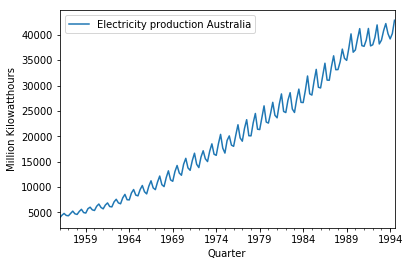

In [25]:
Electricity.plot()
plt.ylabel("Million Kilowatthours")

b) Wenden Sie eine passende Daten-Transformation an, so dass sich die Varianz
der Zeitreihe stabilisiert wird. Hinweis: Wenden Sie die Funktion box.cox an,
und bestimmen Sie einen optimalen Wert für lambda, indem Sie die Graphik
der transformierten Zeitreihe betrachten. Hier ist der Code mit lambda = 1.3:


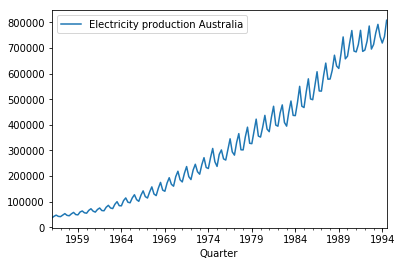

In [28]:
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x**lambd-1)/lambd
# replace "yourSeries" by the name of your series
var1 = boxcox(Electricity, 1.3)
var1.plot()
plt.show()


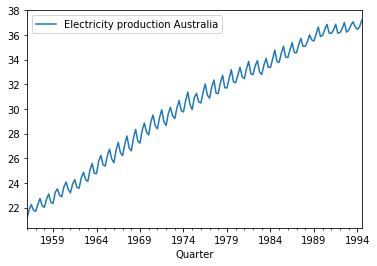

In [45]:
Electricity_tr = boxcox(Electricity, 0.2)
Electricity_tr.plot()
plt.show()

c) Zerlegen Sie die Zeitreihe in die Komponenten trend, saisonale Effekte und Residuen
mit Hilfe der Funktion seasonal_decompose(). Kommentieren Sie die Resultate. Denken Sie, eine Datentransformation vor der Zerlegung wäre angebracht?

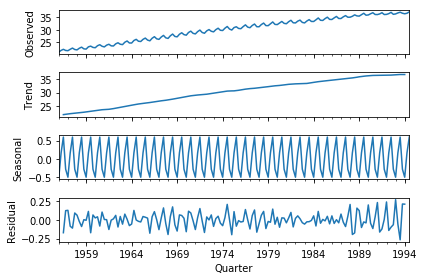

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(Electricity_tr, model="additive", freq=4).plot()
plt.show()